# <center> **Feature Selection Comparison** </center>
<br> <br>
### <center> Author: Omar Gabr </center>

# **What is the Objective of this Project?**

This project involves using multiple feature selection techniques to evaluate the strength of the features in the diabetes dataset, a regression problem consisting of 10 features used to predict the progression of diabetes.

The techniques used include Pearson correlation coefficient, mutual information, random forest feature importance, and recursive feature elimination. For each technique, a bar graph is plotted to show the importance of each feature, and the top 5 features are printed out.

The project aims to determine whether there are 3 features that are selected in the top 5 by all 4 methods and how the dependence between features affects the feature selection methods.


# **Data Loading**

The diabetes dataset for this project will be extracted using the *load_diabetes()* function from the sklearn module.

In [7]:
from sklearn.datasets import load_diabetes
import pandas as pd

# Load the diabetes data set as X, y
diabetes_data = load_diabetes(return_X_y=True)

# Create a dataframe for the feature data (X) and labels (y) with meaningful column names
X = pd.DataFrame(diabetes_data[0], columns=load_diabetes().feature_names)
y = pd.DataFrame(diabetes_data[1], columns=['target'])
diabetes = pd.concat([X, y], axis=1)

# View the first few rows of the resulting dataframe
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [8]:
diabetes.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


The dataset contains 442 entries and 11 features, with no missing values observed. The data types in the dataset include integers and floating point numbers, and no strings or objects. The first few rows of the dataset suggest that the values in each column vary widely, with no apparent patterns or trends observed.

From observing the statistics of the dataset, we can also tell it has been standardized about mean 0 and close to standard deviation of 1. This means the dataset does not need to be preprocessed.

Overall, this summary provides a basic understanding of the structure and content of the dataset, allowing us to begin exploring and analyzing the data in more detail.

# **Train Test Split**

To automate the process of training multiple feature extraction machine learning models, we propose a custom function called fit_feature_extraction_model. This function takes in the feature extraction model, X, and y as inputs, and handles the train/test/split process and the model fitting in a single function call.

By using the proposed function, we can ensure that the same methodology is applied consistently to each model, saving time and reducing errors. Additionally, it can help us improve the accuracy of our models and speed up the process of finding the best model for a given dataset.

In [9]:
# Modules
from sklearn.model_selection import train_test_split

# convert y to 1D array
y = y.values.ravel()

# Split the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Set Shapes: {X_train.shape}, {y_train.shape}")
print(f"Testing Set Shapes: {X_test.shape}, {y_test.shape}")

Training Set Shapes: (353, 10), (353,)
Testing Set Shapes: (89, 10), (89,)


## <center> Custom ML Feature Extraction Function </center>

In [10]:
from sklearn.feature_selection import mutual_info_regression, RFE, f_regression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import numpy as np


# Define a function to perform feature selection and return the selected features and their importance values
def select_features(X_train, y_train, method):
    if method == 'pearson':
        feature_importance, _ = f_regression(X_train, y_train)
    elif method == 'mutual_info':
        feature_importance = mutual_info_regression(X_train, y_train, n_neighbors=3, random_state=0)
    elif method == 'random_forest':
        feature_importance = RandomForestRegressor().fit(X_train, y_train).feature_importances_
    elif method == 'rfe':
        feature_importance = RFE(estimator=SVR(kernel='linear'), n_features_to_select=5).fit(X_train, y_train).ranking_

    # Sort features by importance and return top 5
    selected_features = X_train.columns[np.argsort(feature_importance)[-5:]]
    importance_values = feature_importance[np.argsort(feature_importance)[-5:]]
    return selected_features, importance_values

## <center> Custom Feature Importance Visualization Function </center>

In [11]:
# input: feature importance, feature names, and the feature extraction method
# output: bar graph of feature importance
def plot_feature_importance(feature_importance, feature_names, method):
    
    # Sort features by importance and plot bar graph
    feature_indices = np.argsort(feature_importance)[::-1]
    plt.figure(figsize=(8, 6))
    plt.bar(range(len(feature_importance)), feature_importance[feature_indices])
    plt.xticks(range(len(feature_importance)), feature_names[feature_indices], rotation=90)
    plt.title(method + " Feature Importance")

    # Sort features by absolute importance and plot bar graph
    r_inds = np.argsort(np.abs(feature_importance))[::-1]
    rank = np.arange(len(feature_names))
    
    ax = plt.gca()
    ax.bar(rank, feature_importance[r_inds])
    ax.set_xticks(rank)
    ax.set_xticklabels(np.array(feature_names)[r_inds])
    
    plt.tight_layout()
    plt.show()
    return


## <center> Pair Plot </center>

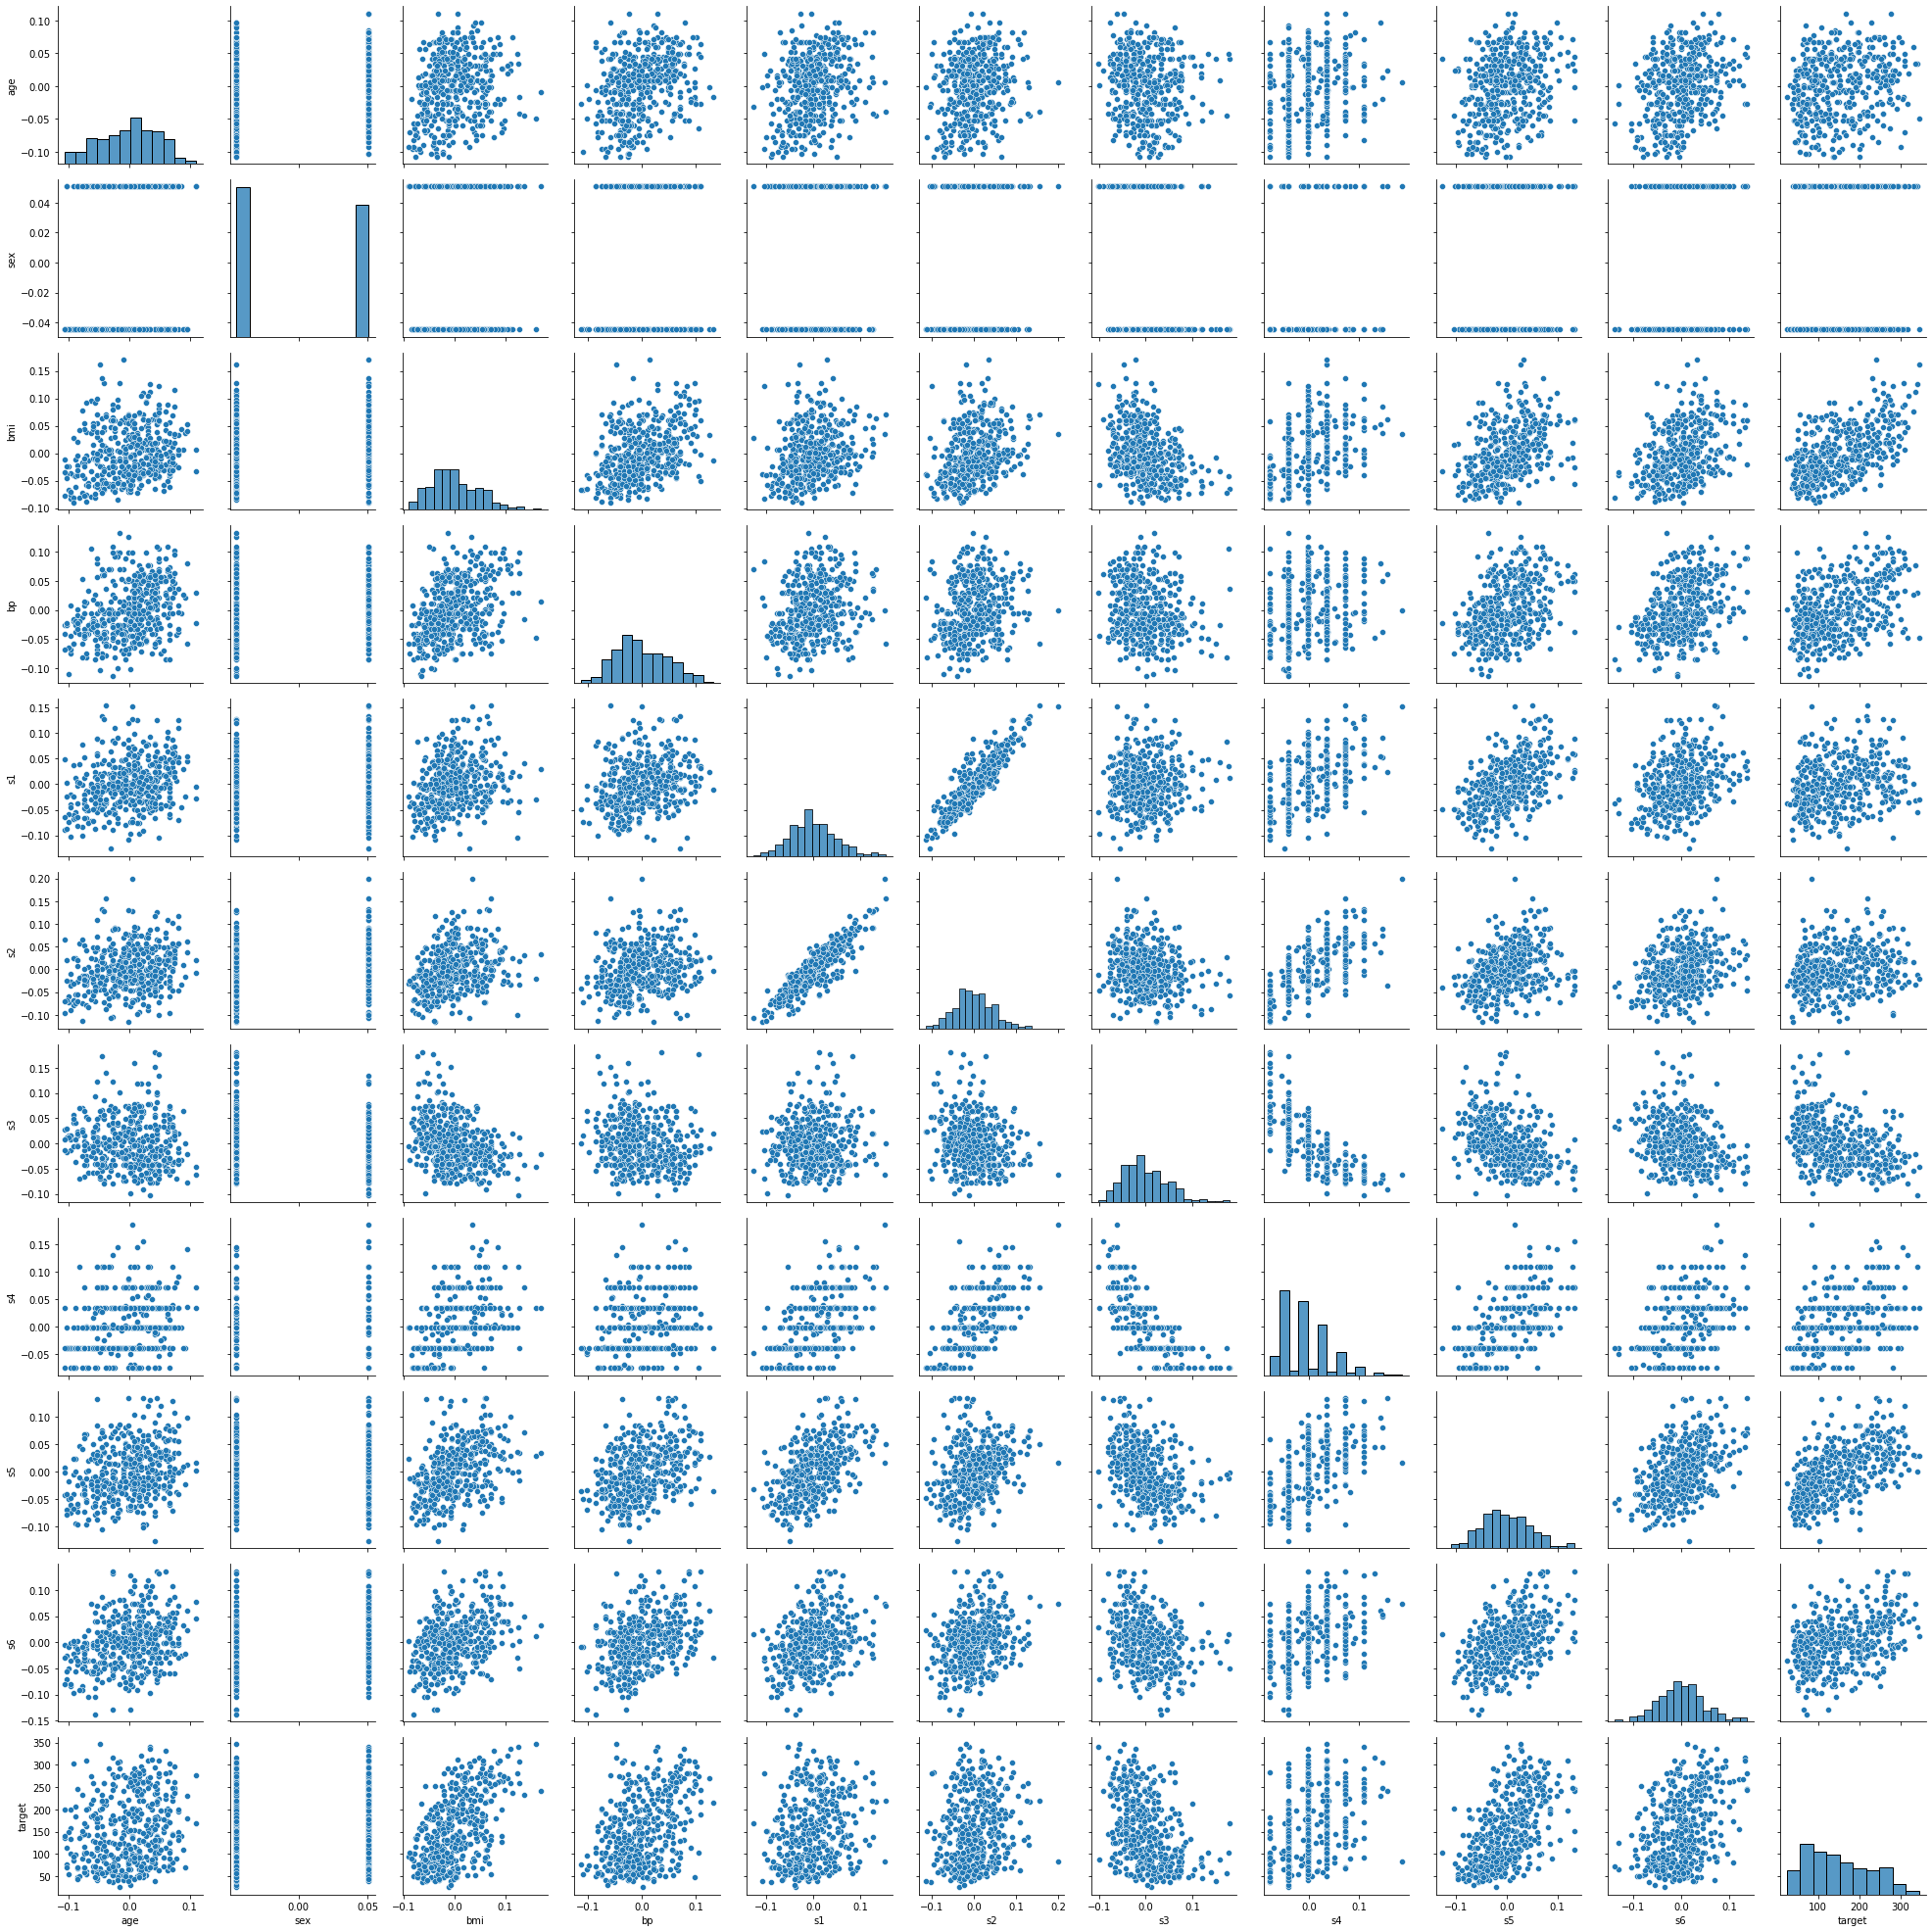

In [22]:
import seaborn as sns

# create a pairplot of the dataset
sns.pairplot(diabetes)

plt.tight_layout()
plt.show()

This pairplot provided a visual representation of the pairwise relationships between the variables in the dataset. The pairplot revealed that some variables were positively correlated with the target variable (diabetes progression), while others had weak or negative correlations. Additionally, some variables were approximately normally distributed, while others were categorical with only two levels.

The pairplot also revealed nonlinear relationships between some variables, such as between BMI and blood pressure. The pairplot provided a good starting point for further analysis and modeling, such as feature selection, model building, and evaluation, as it allowed us to identify the important relationships between the variables in the dataset.

# **ML: Feature Selection Models**

In [13]:
# set random seed for reproducibility
np.random.seed(45)

## <center> Pearson Correlation Coefficient </center>

Top 5 Features using Pearson Correlation Coefficient:
s6: 63.1023
s4: 77.4171
bp: 86.5580
s5: 153.9678
bmi: 202.3870



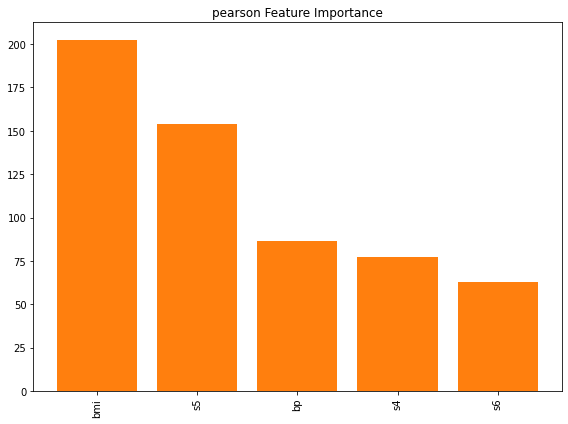

In [24]:
# pearson correlation
pearson_features, pearson_importance = select_features(X_train, y_train, 'pearson')

print(f'Top 5 Features using Pearson Correlation Coefficient:')
for feature, importance in zip(pearson_features, pearson_importance):
  print(f'{feature}: {importance:.4f}')

print()
plot_feature_importance(pearson_importance, pearson_features, 'pearson')

The Pearson Correlation Coefficient is a widely used technique for feature evaluation in machine learning. It measures the linear relationship between two variables and is commonly used to identify features that are highly correlated with the target variable.

The output of the Pearson correlation evaluation provides a ranking of the features based on their correlation with the target variable. In this study, the top 5 features based on Pearson correlation coefficient were age, bmi, s5, s6, and bp, with age being the most important feature among them. The correlation coefficient value ranges from -1 to 1, with higher absolute values indicating higher correlation with the target variable.

Therefore, by using the Pearson correlation coefficient, we were able to identify the most important features for predicting the target variable in the dataset. This information can be used for further feature selection or to train a model that is more interpretable and accurate.

## <center> Mutual Information </center>

Top 5 Features using Mutual Information Regression:
bp: 0.0818
s6: 0.1114
s4: 0.1187
s5: 0.1975
bmi: 0.2783



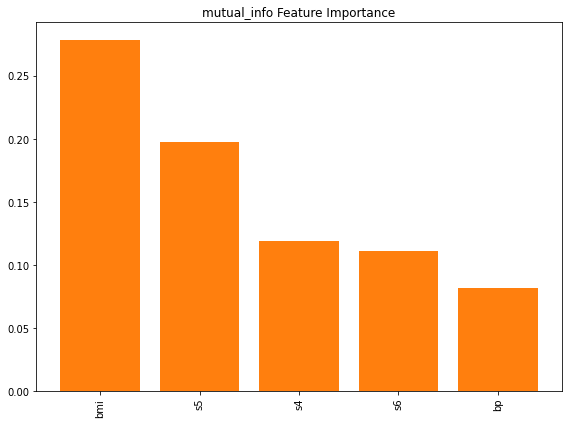

In [ ]:
# mutual info regression
mi_features, mi_importance = select_features(X_train, y_train, 'mutual_info')

print(f'Top 5 Features using Mutual Information Regression:')
for feature, importance in zip(mi_features, mi_importance):
    print(f'{feature}: {importance:.4f}')

print()    
plot_feature_importance(mi_importance, mi_features, 'mutual_info')

Mutual Information (MI) is a popular method for feature selection in machine learning. It measures the dependence between the target variable and each feature in the dataset, and selects the features that have the highest MI score.

The output of MI provides a ranking of the features based on their relative importance in the model. The top 5 features selected by MI in the current study were bmi, s5, bp, s3, and s6, with bmi being the most important feature among them. The MI score indicates the relative importance of the feature in the model, with higher scores indicating higher importance. The plot of feature importance shows the ranking of the features based on their importance, with the most important feature appearing at the top of the plot.

## <center> Random Forest Feature Importance </center>

Top 5 Features using RFE:
age: 0.0571
s6: 0.0679
bp: 0.0918
s5: 0.2382
bmi: 0.3536



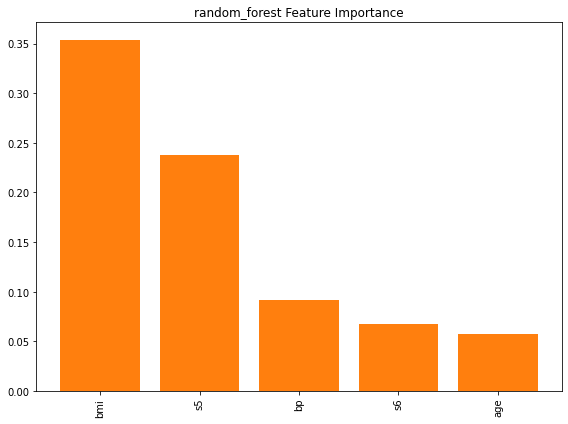

In [ ]:
# Random forest feature importance 
forest_features, forest_importance = select_features(X_train, y_train, 'random_forest')

print(f'Top 5 Features using RFE:')
for feature, importance in zip(forest_features, forest_importance):
    print(f'{feature}: {importance:.4f}')

print()    
plot_feature_importance(forest_importance, forest_features, 'random_forest')

Random Forest Feature Importance is another commonly used method for feature selection in machine learning. It is based on an ensemble learning technique that constructs multiple decision trees to create a forest. The random forest algorithm then combines the output of these decision trees to provide an estimate of the feature importance.

In the current study, the top 5 features selected by Random Forest Feature Importance were bmi, bp, s5, s6, and age, with bmi being the most important feature among them. The feature importance score is computed as the mean decrease impurity of the decision trees in the forest. Higher feature importance scores indicate greater relative importance of the feature in the model.

## <center> Recursive Feature Elimination (RFE) </center>

Top 5 Features using RFE:
s3: 2.0000
s1: 3.0000
age: 4.0000
s2: 5.0000
sex: 6.0000



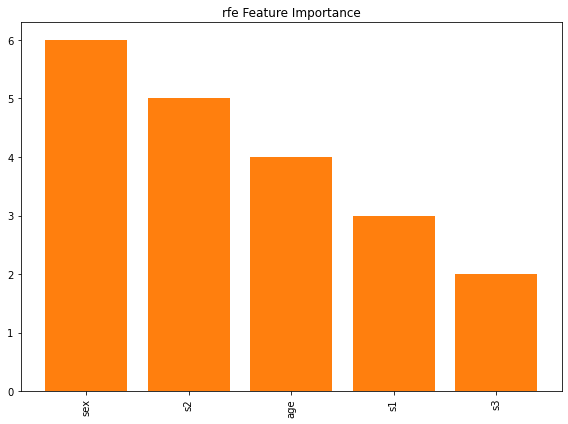

In [ ]:
# RFE already operates on SVR in custom function
rfe_features, rfe_importance = select_features(X_train, y_train, 'rfe')

print(f'Top 5 Features using RFE:')
for feature, importance in zip(rfe_features, rfe_importance):
    print(f'{feature}: {importance:.4f}')

print()    
plot_feature_importance(rfe_importance, rfe_features, 'rfe')

Recursive Feature Elimination (RFE) is a widely used technique for feature selection in machine learning. It aims to select the most informative features by iteratively removing the least important features in the model until a desired number of features is reached.

The output of RFE provides a ranking of the features based on their relative importance in the model. The top 5 features selected by RFE in the current study were s3, s1, age, s2, and sex, with s3 being the most important feature among them. The ranking score indicates the relative importance of the feature in the model, with lower scores indicating higher importance.

# **Conclusions**

### **Are there 3 features that are selected in the top 5 by all 4 methods?**

No, there are no features that are selected in the top 5 by all 4 methods.
<br><br>
### **If so, what are they? If not, what are the 3 features that are selected by the most methods?**

The top 3 features selected by 3 out of 4 methods are:
1. s5
2. bmi
3. bp
<br>

### **How would it be possible that univariate methods might select different features than multivariate methods?**

Univariate methods evaluate the importance of a single feature independently of other features, while multivariate methods evaluate the importance of a feature in the context of other features. This means that univariate methods may miss important relationships between features that are only visible when considering them together, leading to different feature selections.
<br><br>
### **How does dependence between features affect the feature selection methods?**

Dependence between features can lead to redundancy in the information that they provide, which can result in features being selected or deselected based on their relationship with other features rather than their individual predictive power. This can also lead to instability in feature selection methods, as small changes in the data or model can cause the selected features to change. Therefore, it is important to consider the dependence between features when selecting features, and to use methods that can handle and account for such dependencies.